In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import os

GE = pd.read_csv("../data/LINCSL1000/LINCSL1000_processed.csv.gz", compression="gzip")
GE = GE.groupby("Standardized_SMILES").median().reset_index()
GE

,Standardized_SMILES,200814_at,222103_at,201453_x_at,204131_s_at,200059_s_at,205067_at,213702_x_at,214435_x_at,201334_s_at,...,204662_at,203047_at,203343_at,217995_at,218450_at,212536_at,218529_at,211071_s_at,203341_at,205379_at
0,BrC1C(Br)C(Br)C(Br)C(Br)C1Br,0.0038,0.0004,0.0110,0.0218,-0.0128,0.0254,-0.0101,0.0038,-0.0036,...,0.0356,-0.0001,0.0276,-0.0171,-0.0177,0.0045,-0.0184,0.0627,0.0138,0.0338
1,Brc1c(Br)c(Br)c2[n-]nnc2c1Br,-0.0120,0.0001,0.0023,0.0058,0.0004,-0.0113,0.0309,-0.0165,0.0374,...,0.0046,0.0200,0.0035,-0.0291,0.0092,-0.0458,0.0250,0.0808,-0.0270,0.0080
2,Brc1c(NC2=[NH+]CCN2)ccc2nccnc12,0.0144,-0.0014,0.0032,-0.0427,-0.0071,-0.0183,-0.0070,0.0207,-0.0095,...,0.0201,0.0249,0.0168,0.0269,-0.0321,0.0142,-0.0254,-0.0062,0.0340,0.0529
3,Brc1cc2c(cc1C1[NH2+]c3ccccc3C3C=CCC31)OCO2,0.0024,-0.0377,-0.0087,0.0091,-0.0110,0.0037,-0.0008,-0.0021,0.0929,...,-0.0094,-0.0002,-0.1535,-0.0015,-0.0260,-0.0430,-0.0128,0.0506,0.0055,0.0126
4,Brc1ccc(-c2csc(N3CCC(c4nn[n-]n4)CC3)n2)cc1,0.0084,0.0112,0.0100,0.0417,-0.0159,-0.0228,-0.0049,0.0196,0.0106,...,-0.0266,0.0018,0.0299,-0.0302,0.0227,-0.0214,0.0110,-0.0825,0.0090,-0.0132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9127,c1nc(=NCc2ccc3c(c2)OCO3)c2cc(-c3ccoc3)ccc2[n-]1,0.0322,-0.0079,0.0007,0.0034,0.0379,-0.0535,-0.0118,-0.0109,0.0404,...,-0.0108,-0.0545,-0.0074,0.0218,0.0969,0.0461,-0.0573,-0.0407,0.0215,-0.0254
9128,c1nc(CC2CC[NH2+]CC2)c[n-]1,0.0245,0.0131,0.0150,-0.0052,0.0257,-0.0836,0.0003,-0.0081,0.1193,...,-0.0055,-0.0594,0.0011,-0.0217,-0.0289,0.0066,-0.0499,0.0158,0.0142,-0.0075
9129,c1nc(CCCC2CC[NH2+]CC2)c[n-]1,0.0087,0.0099,0.0162,-0.0180,0.0158,0.0123,-0.0021,0.0160,0.0076,...,0.0064,-0.0313,0.0367,-0.0154,0.0142,0.0098,-0.0120,-0.0243,-0.0347,-0.0491
9130,c1nc2[n-]c(=Nc3ccc(N4CCOCC4)cc3)[n-]c(=NC3CCCC...,0.0123,0.0155,0.0074,0.0048,0.0331,-0.0099,0.0103,0.0212,0.0268,...,-0.0401,-0.0031,0.0062,-0.0099,0.0135,-0.0033,-0.0680,0.0270,-0.0071,-0.0208


In [2]:
GE.Standardized_SMILES.nunique()

9132

In [3]:
DICTrank = pd.read_csv("../data/binarised/DICTrank/DICTrank_binarised.csv.gz", compression="gzip")
DICTrank

,Trade Name,Generic/Proper Name(s),Active Ingredient(s),DICT _ Concern,Standardized_SMILES,Standardized_InChI,DICTrank
0,anzemet,dolasetron mesylate,dolasetron mesylate,most,O=C(OC1CC2CC3CC(C1)[NH+]2CC3=O)c1c[nH]c2ccccc12,InChI=1S/C19H20N2O3/c22-18-10-21-12-5-11(18)6-...,1
1,trazodone hydrochloride,trazodone hydrochloride,trazodone hydrochloride,most,O=c1n(CCC[NH+]2CCN(c3cccc(Cl)c3)CC2)nc2ccccn12,InChI=1S/C19H22ClN5O/c20-16-5-3-6-17(15-16)23-...,1
2,nuplazid,pimavanserin tartrate,pimavanserin tartrate,most,CC(C)COc1ccc(CNC(=O)[NH+](Cc2ccc(F)cc2)C2CC[NH...,InChI=1S/C25H34FN3O2/c1-19(2)18-31-24-10-6-20(...,1
3,metformin hydrochloride,metformin hydrochloride,metformin hydrochloride,most,C[NH+](C)C([NH3+])=NC(N)=[NH2+],"InChI=1S/C4H11N5/c1-9(2)4(7)8-3(5)6/h1-2H3,(H5...",1
4,flurbiprofen,flurbiprofen,flurbiprofen,most,CC(C(=O)[O-])c1ccc(-c2ccccc2)c(F)c1,InChI=1S/C15H13FO2/c1-10(15(17)18)12-7-8-13(14...,1
...,...,...,...,...,...,...,...
1015,propylthiouracil,propylthiouracil,propylthiouracil,no,CCCc1cc(=O)[n-]c(=S)[n-]1,InChI=1S/C7H10N2OS/c1-2-3-5-4-6(10)9-7(11)8-5/...,0
1016,trecator,ethionamide,ethionamide,no,CCc1cc(C([NH3+])=S)ccn1,InChI=1S/C8H10N2S/c1-2-7-5-6(8(9)11)3-4-10-7/h...,0
1017,ethosuximide,ethosuximide,ethosuximide,no,CCC1(C)CC(=O)NC1=O,InChI=1S/C7H11NO2/c1-3-7(2)4-5(9)8-6(7)10/h3-4...,0
1018,disulfiram,disulfiram,disulfiram,no,CC[NH+](CC)C(=S)SSC(=S)[NH+](CC)CC,InChI=1S/C10H20N2S4/c1-5-11(6-2)9(13)15-16-10(...,0


In [4]:
# Merge the two datasets on the 'Standardized_SMILES' column
merged_df = DICTrank.merge(GE, on='Standardized_SMILES', suffixes=('_df1', '_df2'))
merged_df

,Trade Name,Generic/Proper Name(s),Active Ingredient(s),DICT _ Concern,Standardized_SMILES,Standardized_InChI,DICTrank,200814_at,222103_at,201453_x_at,...,204662_at,203047_at,203343_at,217995_at,218450_at,212536_at,218529_at,211071_s_at,203341_at,205379_at
0,anzemet,dolasetron mesylate,dolasetron mesylate,most,O=C(OC1CC2CC3CC(C1)[NH+]2CC3=O)c1c[nH]c2ccccc12,InChI=1S/C19H20N2O3/c22-18-10-21-12-5-11(18)6-...,1,-0.00480,-0.03930,0.0007,...,-0.0022,0.0387,-0.01140,-0.0192,-0.0131,0.0122,0.0035,-0.03570,0.00920,-0.0287
1,trazodone hydrochloride,trazodone hydrochloride,trazodone hydrochloride,most,O=c1n(CCC[NH+]2CCN(c3cccc(Cl)c3)CC2)nc2ccccn12,InChI=1S/C19H22ClN5O/c20-16-5-3-6-17(15-16)23-...,1,-0.00940,-0.02240,-0.0172,...,-0.0330,0.0130,-0.04330,0.0039,0.0290,0.0329,-0.0063,-0.01800,0.00440,-0.0259
2,metformin hydrochloride,metformin hydrochloride,metformin hydrochloride,most,C[NH+](C)C([NH3+])=NC(N)=[NH2+],"InChI=1S/C4H11N5/c1-9(2)4(7)8-3(5)6/h1-2H3,(H5...",1,-0.00610,-0.00900,-0.0003,...,-0.0094,0.1106,-0.03960,-0.0367,-0.0505,0.0259,0.0558,0.01280,0.00670,0.0160
3,flurbiprofen,flurbiprofen,flurbiprofen,most,CC(C(=O)[O-])c1ccc(-c2ccccc2)c(F)c1,InChI=1S/C15H13FO2/c1-10(15(17)18)12-7-8-13(14...,1,-0.03160,0.02250,0.0032,...,0.0233,-0.0098,-0.02100,-0.0013,0.0571,0.0390,0.0500,0.01050,-0.01500,0.0066
4,ketoprofen,ketoprofen,ketoprofen,most,CC(C(=O)[O-])c1cccc(C(=O)c2ccccc2)c1,InChI=1S/C16H14O3/c1-11(16(18)19)13-8-5-9-14(1...,1,-0.00995,0.00275,-0.0122,...,-0.0332,0.0130,0.00295,0.0151,0.0077,0.0019,-0.0061,-0.01575,-0.00515,0.0153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,propylthiouracil,propylthiouracil,propylthiouracil,no,CCCc1cc(=O)[n-]c(=S)[n-]1,InChI=1S/C7H10N2OS/c1-2-3-5-4-6(10)9-7(11)8-5/...,0,0.00360,-0.01930,-0.0193,...,-0.0305,0.0044,0.02120,0.0233,0.0542,-0.0820,-0.0048,0.01860,-0.01350,0.0148
546,trecator,ethionamide,ethionamide,no,CCc1cc(C([NH3+])=S)ccn1,InChI=1S/C8H10N2S/c1-2-7-5-6(8(9)11)3-4-10-7/h...,0,0.01710,0.02260,-0.0198,...,-0.0315,0.0371,-0.01400,-0.0081,0.0493,-0.0524,-0.0216,-0.00420,-0.00300,0.0251
547,ethosuximide,ethosuximide,ethosuximide,no,CCC1(C)CC(=O)NC1=O,InChI=1S/C7H11NO2/c1-3-7(2)4-5(9)8-6(7)10/h3-4...,0,-0.00770,-0.00790,-0.0147,...,0.0055,-0.0105,0.00300,0.0110,-0.0387,-0.0239,-0.0278,0.02360,-0.01980,-0.0225
548,disulfiram,disulfiram,disulfiram,no,CC[NH+](CC)C(=S)SSC(=S)[NH+](CC)CC,InChI=1S/C10H20N2S4/c1-5-11(6-2)9(13)15-16-10(...,0,-0.05950,0.01340,0.0095,...,-0.0873,0.0129,0.02010,-0.0243,0.0256,-0.0500,-0.0353,-0.03140,-0.05730,0.0010


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, mannwhitneyu, kruskal



# Set a colorblind-friendly palette
colors = sns.color_palette("colorblind")
results = []

for label in GE.columns[1:]:
    
    # 1. Visualization

    # Set a colorblind-friendly palette
    colors = sns.color_palette("colorblind")
    # Create a bar plot
    #plt.figure(figsize=(4, 4), dpi=100)
    #sns.set(style="white")  # Set the style

    #ax = sns.barplot(x="DICT _ Concern", y=label, data=df, ci=None, palette=colors)

    # Set labels and title
    print(f'Proportion of {label}')
    #ax.set_ylabel(f'Proportion of {label}', fontsize=12)
    #ax.set_xlabel('DICT_class', fontsize=12)
    #ax.set_title(f'Proportion of {label} across DICT_class', fontsize=14)

    # Remove box line, set y-axis on the left
    #ax.spines['top'].set_visible(False)
    #ax.spines['right'].set_visible(False)
    #ax.spines['left'].set_position(('outward', 10))
    #ax.yaxis.set_ticks_position('left')

    #plt.show()


    # Perform the Kruskal-Wallis test
    group1 = merged_df[merged_df["DICT _ Concern"] == 'most'][label]
    group2 = merged_df[merged_df["DICT _ Concern"] == 'less'][label]
    group3 = merged_df[merged_df["DICT _ Concern"] == 'no'][label]
        
    try:
        h, p = kruskal(group1, group2, group3)
    except:
        continue
        
    results.append({
            'Label': label,
            'Statistic value': h,
            'P value': p,
            'Test': 'Kruskal-Wallis'
        })

results_df = pd.DataFrame(results)
results_df


Proportion of 200814_at
Proportion of 222103_at
Proportion of 201453_x_at
Proportion of 204131_s_at
Proportion of 200059_s_at
Proportion of 205067_at
Proportion of 213702_x_at
Proportion of 214435_x_at
Proportion of 201334_s_at
Proportion of 213721_at
Proportion of 202627_s_at
Proportion of 217478_s_at
Proportion of 206254_at
Proportion of 200602_at
Proportion of 205581_s_at
Proportion of 206562_s_at
Proportion of 205897_at
Proportion of 203135_at
Proportion of 204531_s_at
Proportion of 200882_s_at
Proportion of 206501_x_at
Proportion of 207199_at
Proportion of 209572_s_at
Proportion of 203110_at
Proportion of 201841_s_at
Proportion of 204297_at
Proportion of 209682_at
Proportion of 206752_s_at
Proportion of 209747_at
Proportion of 204061_at
Proportion of 208711_s_at
Proportion of 214062_x_at
Proportion of 207034_s_at
Proportion of 204369_at
Proportion of 200081_s_at
Proportion of 203277_at
Proportion of 212287_at
Proportion of 213191_at
Proportion of 218995_s_at
Proportion of 201471_s

Proportion of 202794_at
Proportion of 201719_s_at
Proportion of 201040_at
Proportion of 36936_at
Proportion of 201697_s_at
Proportion of 209515_s_at
Proportion of 1007_s_at
Proportion of 202651_at
Proportion of 202703_at
Proportion of 203120_at
Proportion of 202284_s_at
Proportion of 202011_at
Proportion of 203192_at
Proportion of 201761_at
Proportion of 203456_at
Proportion of 202776_at
Proportion of 202602_s_at
Proportion of 201774_s_at
Proportion of 201361_at
Proportion of 202188_at
Proportion of 204458_at
Proportion of 201080_at
Proportion of 201959_s_at
Proportion of 201121_s_at
Proportion of 201000_at
Proportion of 202756_s_at
Proportion of 201767_s_at
Proportion of 202446_s_at
Proportion of 202087_s_at
Proportion of 200766_at
Proportion of 209435_s_at
Proportion of 201234_at
Proportion of 203574_at
Proportion of 202208_s_at
Proportion of 202119_s_at
Proportion of 201462_at
Proportion of 209166_s_at
Proportion of 201572_x_at
Proportion of 201152_s_at
Proportion of 203360_s_at
Pro

Proportion of 209603_at
Proportion of 209507_at
Proportion of 202720_at
Proportion of 203458_at
Proportion of 205205_at
Proportion of 212973_at
Proportion of 212070_at
Proportion of 207877_s_at
Proportion of 210153_s_at
Proportion of 214061_at
Proportion of 203696_s_at
Proportion of 218316_at
Proportion of 205085_at
Proportion of 214086_s_at
Proportion of 219016_at
Proportion of 217777_s_at
Proportion of 219281_at
Proportion of 202761_s_at
Proportion of 201817_at
Proportion of 218175_at
Proportion of 219184_x_at
Proportion of 204999_s_at
Proportion of 215093_at
Proportion of 217761_at
Proportion of 218168_s_at
Proportion of 213343_s_at
Proportion of 202813_at
Proportion of 219222_at
Proportion of 212689_s_at
Proportion of 211725_s_at
Proportion of 203346_s_at
Proportion of 204484_at
Proportion of 212833_at
Proportion of 212899_at
Proportion of 204711_at
Proportion of 212462_at
Proportion of 212624_s_at
Proportion of 210058_at
Proportion of 218050_at
Proportion of 217900_at
Proportion o

,Label,Statistic value,P value,Test
0,200814_at,2.115535,0.347230,Kruskal-Wallis
1,222103_at,18.393708,0.000101,Kruskal-Wallis
2,201453_x_at,4.351151,0.113543,Kruskal-Wallis
3,204131_s_at,0.753129,0.686215,Kruskal-Wallis
4,200059_s_at,1.539150,0.463210,Kruskal-Wallis
...,...,...,...,...
973,212536_at,5.791221,0.055265,Kruskal-Wallis
974,218529_at,0.937800,0.625690,Kruskal-Wallis
975,211071_s_at,2.929856,0.231095,Kruskal-Wallis
976,203341_at,0.303878,0.859041,Kruskal-Wallis


<Figure size 2400x1800 with 0 Axes>

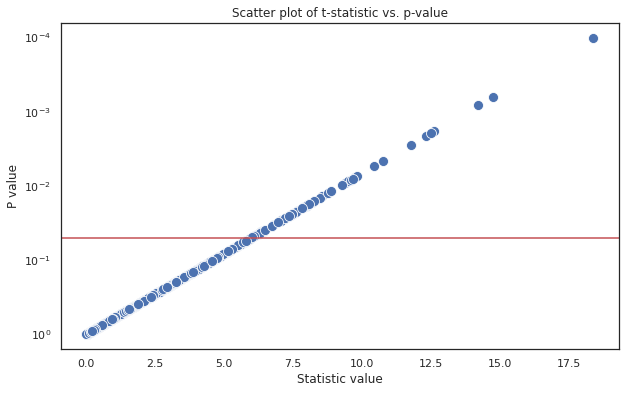

In [7]:
## Plotting

plt.figure(figsize=(8, 6), dpi=300) 
sns.set(style="white")  # Set the style
    
plt.figure(figsize=(10, 6))
sns.scatterplot(data=results_df, x='Statistic value', y='P value', palette='tab10', s=100)
plt.yscale('log')
plt.gca().invert_yaxis()  # This line will reverse the y-axis
    
plt.title('Scatter plot of t-statistic vs. p-value')
#plt.grid(True, which="both", ls="--", c='0.65')
    
plt.axhline(y=0.05, color='r', linestyle='-')
#plt.legend()
plt.show()
           

In [8]:
results_df["Statistic value" ] = results_df["Statistic value"].astype(float)
results_df["P value" ] = results_df["P value"].astype(float)
results_df = results_df.sort_values("P value", ascending=True)
results_df

,Label,Statistic value,P value,Test
1,222103_at,18.393708,0.000101,Kruskal-Wallis
440,201080_at,14.742512,0.000629,Kruskal-Wallis
374,209092_s_at,14.226096,0.000814,Kruskal-Wallis
117,208644_at,12.627019,0.001812,Kruskal-Wallis
600,215980_s_at,12.526503,0.001905,Kruskal-Wallis
...,...,...,...,...
934,218898_at,0.008380,0.995819,Kruskal-Wallis
436,201774_s_at,0.005799,0.997105,Kruskal-Wallis
284,201560_at,0.003649,0.998177,Kruskal-Wallis
19,200882_s_at,0.001100,0.999450,Kruskal-Wallis


In [9]:
results_df[results_df["P value"]<0.05][:20]

,Label,Statistic value,P value,Test
1,222103_at,18.393708,0.000101,Kruskal-Wallis
440,201080_at,14.742512,0.000629,Kruskal-Wallis
374,209092_s_at,14.226096,0.000814,Kruskal-Wallis
117,208644_at,12.627019,0.001812,Kruskal-Wallis
600,215980_s_at,12.526503,0.001905,Kruskal-Wallis
30,208711_s_at,12.316778,0.002116,Kruskal-Wallis
126,201202_at,11.782580,0.002763,Kruskal-Wallis
248,206846_s_at,10.782820,0.004556,Kruskal-Wallis
670,212458_at,10.430812,0.005432,Kruskal-Wallis
676,213419_at,9.826073,0.007350,Kruskal-Wallis


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Set a colorblind-friendly palette
colors = sns.color_palette("colorblind")
results = []

for label in GE.columns[1:]:
    
    # 1. Visualization

    # Set a colorblind-friendly palette
    colors = sns.color_palette("colorblind")
    # Create a bar plot
    #plt.figure(figsize=(4, 4), dpi=100)
    #sns.set(style="white")  # Set the style

    #ax = sns.barplot(x="DICT _ Concern", y=label, data=df, ci=None, palette=colors)

    # Set labels and title
    print(f'Proportion of {label}')
    #ax.set_ylabel(f'Proportion of {label}', fontsize=12)
    #ax.set_xlabel('DICT_class', fontsize=12)
    #ax.set_title(f'Proportion of {label} across DICT_class', fontsize=14)

    # Remove box line, set y-axis on the left
    #ax.spines['top'].set_visible(False)
    #ax.spines['right'].set_visible(False)
    #ax.spines['left'].set_position(('outward', 10))
    #ax.yaxis.set_ticks_position('left')

    #plt.show()

    # 2.Tests


    group1 = merged_df[merged_df["DICTrank"] == 0][label]
    group2 = merged_df[merged_df["DICTrank"] == 1][label]
        
    # Perform the Mann-Whitney U test
    try:
        u_stat, p = mannwhitneyu(group1, group2)
    except:
        continue
    results.append({
            'Label': label,
            'Proportion': merged_df[label].mean(),
            'Test': 'Mann-Whitney U',
            'Statistic value': u_stat,
            'P value': p
        })

results_df = pd.DataFrame(results)
results_df

Proportion of 200814_at
Proportion of 222103_at
Proportion of 201453_x_at
Proportion of 204131_s_at
Proportion of 200059_s_at
Proportion of 205067_at
Proportion of 213702_x_at
Proportion of 214435_x_at
Proportion of 201334_s_at
Proportion of 213721_at
Proportion of 202627_s_at
Proportion of 217478_s_at
Proportion of 206254_at
Proportion of 200602_at
Proportion of 205581_s_at
Proportion of 206562_s_at
Proportion of 205897_at
Proportion of 203135_at
Proportion of 204531_s_at
Proportion of 200882_s_at
Proportion of 206501_x_at
Proportion of 207199_at
Proportion of 209572_s_at
Proportion of 203110_at
Proportion of 201841_s_at
Proportion of 204297_at
Proportion of 209682_at
Proportion of 206752_s_at
Proportion of 209747_at
Proportion of 204061_at
Proportion of 208711_s_at
Proportion of 214062_x_at
Proportion of 207034_s_at
Proportion of 204369_at
Proportion of 200081_s_at
Proportion of 203277_at
Proportion of 212287_at
Proportion of 213191_at
Proportion of 218995_s_at
Proportion of 201471_s

Proportion of 203120_at
Proportion of 202284_s_at
Proportion of 202011_at
Proportion of 203192_at
Proportion of 201761_at
Proportion of 203456_at
Proportion of 202776_at
Proportion of 202602_s_at
Proportion of 201774_s_at
Proportion of 201361_at
Proportion of 202188_at
Proportion of 204458_at
Proportion of 201080_at
Proportion of 201959_s_at
Proportion of 201121_s_at
Proportion of 201000_at
Proportion of 202756_s_at
Proportion of 201767_s_at
Proportion of 202446_s_at
Proportion of 202087_s_at
Proportion of 200766_at
Proportion of 209435_s_at
Proportion of 201234_at
Proportion of 203574_at
Proportion of 202208_s_at
Proportion of 202119_s_at
Proportion of 201462_at
Proportion of 209166_s_at
Proportion of 201572_x_at
Proportion of 201152_s_at
Proportion of 203360_s_at
Proportion of 202716_at
Proportion of 202427_s_at
Proportion of 203013_at
Proportion of 200810_s_at
Proportion of 202458_at
Proportion of 202733_at
Proportion of 200078_s_at
Proportion of 200752_s_at
Proportion of 202260_s_a

Proportion of 203696_s_at
Proportion of 218316_at
Proportion of 205085_at
Proportion of 214086_s_at
Proportion of 219016_at
Proportion of 217777_s_at
Proportion of 219281_at
Proportion of 202761_s_at
Proportion of 201817_at
Proportion of 218175_at
Proportion of 219184_x_at
Proportion of 204999_s_at
Proportion of 215093_at
Proportion of 217761_at
Proportion of 218168_s_at
Proportion of 213343_s_at
Proportion of 202813_at
Proportion of 219222_at
Proportion of 212689_s_at
Proportion of 211725_s_at
Proportion of 203346_s_at
Proportion of 204484_at
Proportion of 212833_at
Proportion of 212899_at
Proportion of 204711_at
Proportion of 212462_at
Proportion of 212624_s_at
Proportion of 210058_at
Proportion of 218050_at
Proportion of 217900_at
Proportion of 209710_at
Proportion of 202599_s_at
Proportion of 202705_at
Proportion of 200060_s_at
Proportion of 221230_s_at
Proportion of 209531_at
Proportion of 218346_s_at
Proportion of 201997_s_at
Proportion of 203067_at
Proportion of 221081_s_at
Prop

,Label,Proportion,Test,Statistic value,P value
0,200814_at,-0.001270,Mann-Whitney U,22598.5,0.602188
1,222103_at,0.001233,Mann-Whitney U,17169.0,0.000024
2,201453_x_at,-0.000794,Mann-Whitney U,20350.0,0.039748
3,204131_s_at,0.006869,Mann-Whitney U,22102.0,0.389665
4,200059_s_at,0.001331,Mann-Whitney U,23669.5,0.834250
...,...,...,...,...,...
973,212536_at,-0.002252,Mann-Whitney U,19878.5,0.017395
974,218529_at,-0.004168,Mann-Whitney U,23104.0,0.860183
975,211071_s_at,0.001039,Mann-Whitney U,25769.5,0.100391
976,203341_at,-0.003931,Mann-Whitney U,23046.5,0.829457


In [12]:
results_df["Statistic value" ] = results_df["Statistic value"].astype(float)
results_df = results_df.sort_values("Statistic value", ascending=False)
results_df

,Label,Proportion,Test,Statistic value,P value
686,204617_s_at,-0.004310,Mann-Whitney U,27844.5,0.002216
676,213419_at,0.002531,Mann-Whitney U,27795.0,0.002480
894,209531_at,0.000497,Mann-Whitney U,27528.0,0.004462
930,213190_at,0.001473,Mann-Whitney U,27274.0,0.007583
646,56197_at,0.001852,Mann-Whitney U,27243.5,0.008066
...,...,...,...,...,...
285,202282_at,0.000121,Mann-Whitney U,19357.0,0.006251
536,207871_s_at,0.001072,Mann-Whitney U,19198.5,0.004476
541,202683_s_at,-0.001421,Mann-Whitney U,18962.0,0.002665
126,201202_at,-0.014961,Mann-Whitney U,18794.0,0.001817


<Figure size 2400x1800 with 0 Axes>

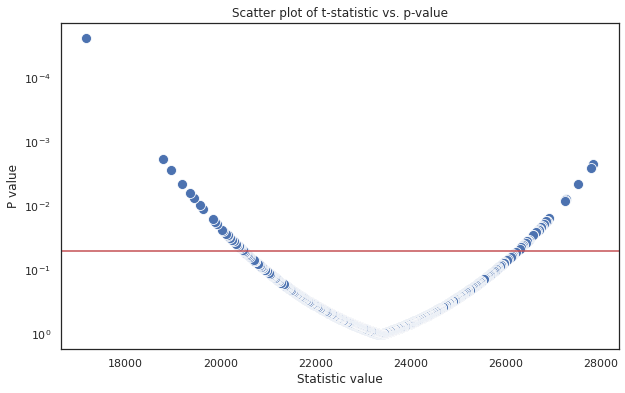

In [13]:
## Plotting

plt.figure(figsize=(8, 6), dpi=300) 
sns.set(style="white")  # Set the style
    
plt.figure(figsize=(10, 6))
sns.scatterplot(data=results_df, x='Statistic value', y='P value', palette='tab10', s=100)
plt.yscale('log')
plt.gca().invert_yaxis()  # This line will reverse the y-axis
    
plt.title('Scatter plot of t-statistic vs. p-value')
#plt.grid(True, which="both", ls="--", c='0.65')
    
plt.axhline(y=0.05, color='r', linestyle='-')
#plt.legend()
plt.show()
           

In [14]:
results_df[results_df["P value"]<0.05]

,Label,Proportion,Test,Statistic value,P value
686,204617_s_at,-0.004310,Mann-Whitney U,27844.5,0.002216
676,213419_at,0.002531,Mann-Whitney U,27795.0,0.002480
894,209531_at,0.000497,Mann-Whitney U,27528.0,0.004462
930,213190_at,0.001473,Mann-Whitney U,27274.0,0.007583
646,56197_at,0.001852,Mann-Whitney U,27243.5,0.008066
...,...,...,...,...,...
285,202282_at,0.000121,Mann-Whitney U,19357.0,0.006251
536,207871_s_at,0.001072,Mann-Whitney U,19198.5,0.004476
541,202683_s_at,-0.001421,Mann-Whitney U,18962.0,0.002665
126,201202_at,-0.014961,Mann-Whitney U,18794.0,0.001817
